In [1]:
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import requests
import datetime
from bs4 import BeautifulSoup


In [2]:
URL = "https://www.run2pix.com/report/report_w.php?EventCode=20161218&Race=MA&sn=136"
result = requests.get(URL)
result.encoding = 'utf-8'
soup = BeautifulSoup(result.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


In [3]:
def get_data_df(url):
    result = requests.get(url)
    result.encoding = 'utf-8'
    soup = BeautifulSoup(result.text)
    data = []
    for tr in soup.find_all('table')[1].find_all('tr'):
        if tr.find_all('th'):
            columns = [th.get_text().strip() for th in tr.find_all('th')]
        if len(tr.find_all('td')) == 8 and not tr.find('table'):
            data.append([td.get_text().strip() for td in tr.find_all('td')])
    return data, columns

In [4]:
data = []
URL = "https://www.run2pix.com/report/report_w.php?EventCode=20161218&Race=MA&sn=136&pagenum={}"
for i in range(1,13):
    print(i)
    result_data, columns = get_data_df(URL.format(i))
    data += result_data
df = pd.DataFrame(data, columns=columns)

1


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/local/Cellar/python3/3.5.2/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "html.parser")

  markup_type=markup_type))


2
3
4
5
6
7
8
9
10
11
12


In [10]:
def parse_time(input_str):
    seg = input_str.split(":")
    hour = int(seg[0])
    minute = int(seg[1])
    second = int(seg[2])
    if second >= 60:
        minute += 1
        second %= 60
    if minute >= 60:
        hour += 1
        minute %= 60
    return datetime.time(hour, minute, second)
df['OfficialTime'] = df['OfficialTime'].apply(parse_time)

In [13]:
df['RankAll'] = df['RankAll'].apply(lambda x:int(x))

In [18]:
df['seconds'] = df['OfficialTime'].apply(lambda x:x.hour*3600 + x.minute*60 + x.second)

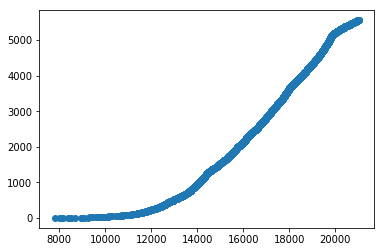

In [19]:
plt.scatter( df['seconds'], df['RankAll'])

In [12]:
df['RankAll'][0]

'1'